In [1]:
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt

In [2]:
def Kmeans_initialization(image, K, method):
    # This function used for finding initial K points of k-means clustering algorithm.
    # If method='m', the inital points are chosen manually.
    # If method='r', random initialization is performed.
    
    if method=='m':
        %matplotlib tk
        plt.imshow(image) # Open image in a distinct window
        points = plt.ginput(K,timeout=300) # Choose initial points as desired
        plt.close()
        %matplotlib inline
        
        initial_RGBs = np.zeros((K, 3))
        for i, cor in enumerate(points):
            # Return the RGB values of each of the chosen points:
            x, y = int(cor[0]), int(cor[1])
            initial_RGBs[i,:] = image[y,x,:]
        
    if method=='r':
        # Choose random values between 0-255 for each RGB values of each initialization:
        initial_RGBs = np.random.randint(0, 256, size=(K, 3)) 
        
    return initial_RGBs

In [3]:
def Kmeans(X, initial_means, iteration_num):
    m = X.shape[0] # number of samples
    K, dim = initial_means.shape[0], initial_means.shape[1]
    
    cluster_assignments = np.zeros((m,1))
    cluster_means = initial_means
    
    for i in range(iteration_num):
        
        # Find the cluster of each point by finding the closest cluster mean in 3D RGB space:
        for sample in range(m):
            L2_norms = norm( ( X[sample,:] - cluster_means ), axis=1)
            cluster_assignments[sample,0] = np.argmin(L2_norms)
        
        # Update cluster centers:
        for k in range(K):
            cluster_means[k,:] = np.mean(X[cluster_assignments[:,0]==k,:], axis=0)
            
    return cluster_means, cluster_assignments[:,0]

In [4]:
def quantize(image, K, method='m', iter_num=10):
    # This function used for image quantization.
    # If method='m', the inital centroids are chosen manually.
    # If method='r', random initialization is performed.
    # Default random='m'
    
    # First reshape the image from (height,width,3) to (height*width,3)
    X = np.reshape(image, (image.shape[0]*image.shape[1], 3))
    
    # Find the initialize the cluster centroids:
    initial_means = Kmeans_initialization(image, K, method)
    
    # Apply K-means to refine the centroids of clusters:
    cluster_means, cluster_assignments = Kmeans(X, initial_means, iter_num)
    
    # Find the matrix of quantized image with resulting cluster means and pixel assignments:
    X_quantized = np.zeros(X.shape)
    for k in range(K):
        X_quantized[cluster_assignments==k,:] = cluster_means[k,:]
    
    # Reshape the image from the matrix:
    image_quantized = np.reshape(X_quantized, (image.shape[0], image.shape[1], 3))
    
    return image_quantized.astype(int) # Convert float RBG values to integer and return.

The shape of image read is (973, 1400, 3)


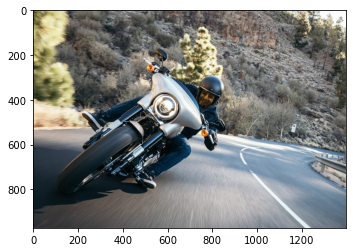

In [5]:
# Read the original image and display it along with its size:
directory = 'C:/Users/oguzh/Desktop/Graduate_Courses/CMPE 537 Computer Vision/HW1/'
image = plt.imread(directory+'3.jpg')
print('The shape of image read is {}'.format(image.shape))
plt.imshow(image)

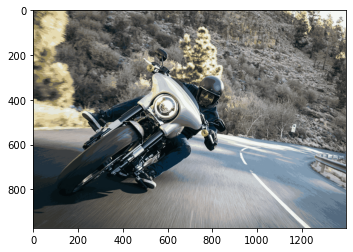

In [6]:
# Choose number of quantization levels:
K = 32

# Choose how to initialize K-means centroids ('m' for manual, 'r' for random):
method = 'm'

# Choose number of iterations performed in K-means:
iter_num = 5

# Call the quantizer function:
image_quantized = quantize(image, K, method=method, iter_num=iter_num)

# Plot the resulting image:
plt.imshow(image_quantized)